In [1]:
import zipfile

zip_file_path = "Images.zip"
output_dir = "Images"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)

Import Packages

In [1]:
from torchvision import datasets
from collections import Counter
import matplotlib.pyplot as plt
import torch
from PIL import Image
import pandas as pd
import numpy as np
import os
import re
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
from PIL import Image

EDA

In [2]:
# Define the path to your dataset
data_dir = 'Images/Images'

# Load dataset using ImageFolder
dataset = datasets.ImageFolder(root=data_dir)

# Extract filenames from dataset.samples (which contains tuples of (image_path, label))
filenames = [os.path.basename(sample[0]) for sample in dataset.samples]

In [4]:
# Function to strip numbers, remove .jpg, and replace underscores with spaces
def extract_breed(filename):
    # Remove numbers
    breed = re.sub(r'\d+', '', filename)
    # Remove .jpg extension
    breed = breed.replace('.jpg', '')
    # Replace underscores with spaces
    breed = breed.replace('_', ' ')
    return breed

# Apply the function to all filenames
breeds = [extract_breed(fname) for fname in filenames]

In [5]:
# Create a DataFrame with 'filename' and 'breed' columns
df = pd.DataFrame({
    'filename': filenames,
    'breed': breeds
})

print(df.head())  # Display first few rows of the DataFrame

                      filename       breed
0  Chihuahua02085620_10074.jpg  Chihuahua 
1  Chihuahua02085620_10131.jpg  Chihuahua 
2  Chihuahua02085620_10621.jpg  Chihuahua 
3   Chihuahua02085620_1073.jpg  Chihuahua 
4  Chihuahua02085620_10976.jpg  Chihuahua 


In [7]:
# Assuming df is your DataFrame with a 'breed' column
unique_breeds = df['breed'].unique()

# Print all the unique breeds
print("List of unique breeds:")
for breed in unique_breeds:
    print(breed)
    
num_breeds = df['breed'].nunique()
print(num_breeds)

List of unique breeds:
Chihuahua 
Japanese Spaniel 
Maltese Dog 
Pekinese 
ShihTzu 
Blenheim Spaniel 
Blenheim Spaniel -checkpoint
Papillion 
Toy Terrier 
Rhodesian Ridgeback 
Afghan Hound 
Basset 
Beagle 
Bloodhound 
Bluetick 
Black and Tan Coonhound 
Walker Hound 
English Foxhound 
Redbone 
Borzoi 
Irish Wolfhound 
Italian Greyhound 
Whippet 
Ibizan 
Norwegian Elkhound 
Otterhound 
Saluki 
Scottish Deerhound 
Weimaraner 
Staffordshire Bullterrier 
American Staffordshire Bullterrier 
Bedlington Terrier 
Border Terrier 
Kerry Blue Terrier 
Irish Terrier 
Norfolk Terrier 
Norwich Terrier 
Yorkshire Terrier 
Wire-haired Fox Terrier 
Lakeland Terrier 
Sealyham Terrier 
Airedale 
Cairn 
Australian Terrier 
Dandie Dinmont 
Boston Bull 
Miniature Schnauzer 
Giant Schnauzer 
Standard Schnauzer 
Scotch Terrier 
Tibetan Terrier 
Silky Terrier 
Soft-Coated Wheaten Terrier 
West Highland Terrier 
Lhasa 
Flat-Coated Retriever 
Curly-Coated Retriever 
Golden Retriever 
Labrador Retriever 
Chesapeak

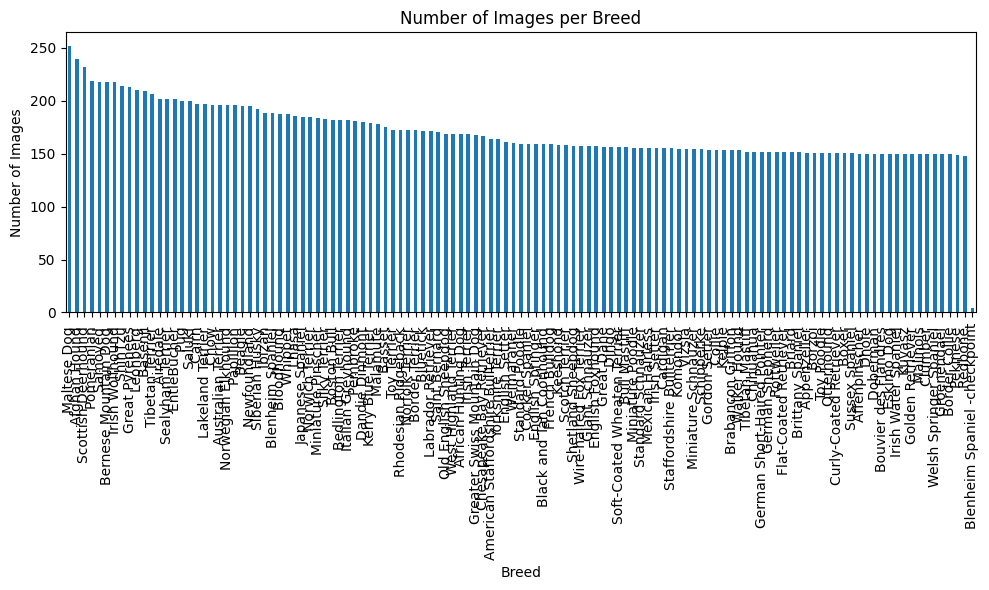

In [7]:
# Count the number of images for each breed
breed_counts = df['breed'].value_counts()

# Plot a bar chart of the number of images per breed
plt.figure(figsize=(10, 6))  # Set figure size for better readability
breed_counts.plot(kind='bar')
plt.title('Number of Images per Breed')
plt.xlabel('Breed')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show plot
plt.show()

In [7]:
# Get the 5 breeds with the lowest number of images
lowest_5_breeds = breed_counts.nsmallest(5)

# Get the 5 breeds with the highest number of images
highest_5_breeds = breed_counts.nlargest(5)

# Display results
print("Breeds with the lowest number of images:")
print(lowest_5_breeds)

print("\nBreeds with the highest number of images:")
print(highest_5_breeds)

Breeds with the lowest number of images:
breed
Blenheim Spaniel -checkpoint      4
Redbone                         148
Pekinese                        149
Affenpinscher                   150
Dhole                           150
Name: count, dtype: int64

Breeds with the highest number of images:
breed
Maltese Dog            252
Afghan Hound           239
Scottish Deerhound     232
Pomeranian             219
Samoyed                218
Name: count, dtype: int64


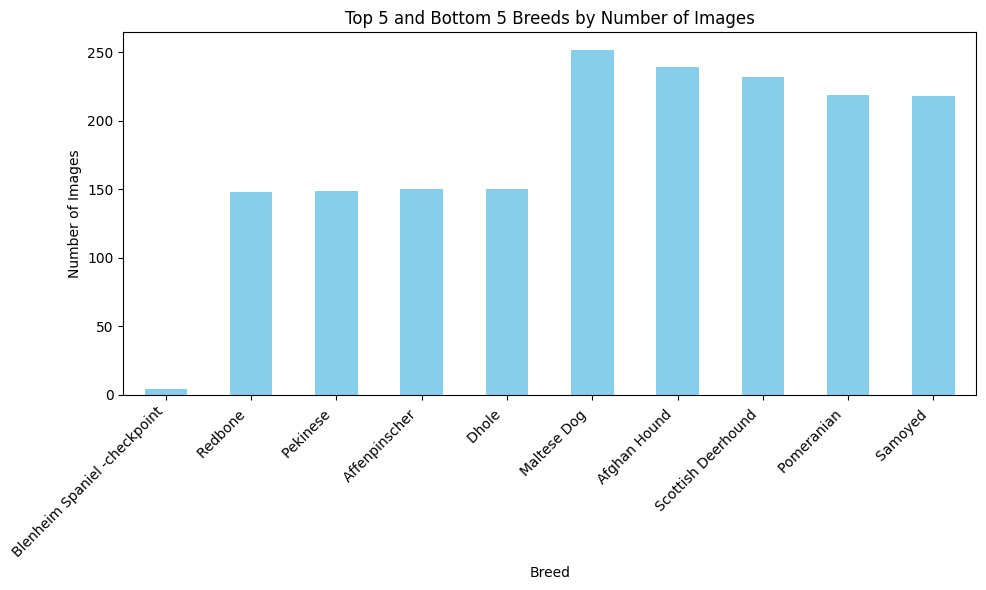

In [8]:
combined_breeds = pd.concat([lowest_5_breeds, highest_5_breeds])

# Plot a bar chart
plt.figure(figsize=(10, 6))  # Set figure size for better readability
combined_breeds.plot(kind='bar', color='skyblue')
plt.title('Top 5 and Bottom 5 Breeds by Number of Images')
plt.xlabel('Breed')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Show plot
plt.show()

Analysis

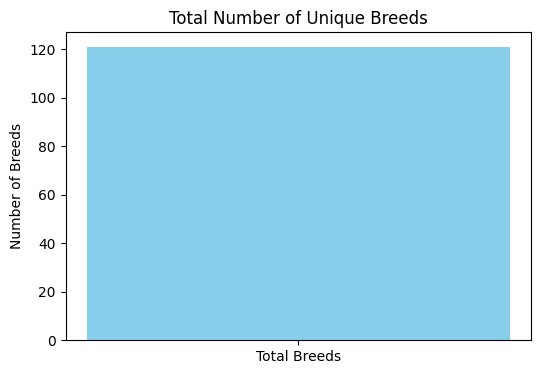

In [6]:
# Create a bar chart to show the total number of breeds
plt.figure(figsize=(6, 4))
plt.bar(['Total Breeds'], [num_breeds], color='skyblue')
plt.title('Total Number of Unique Breeds')
plt.ylabel('Number of Breeds')

# Show plot
plt.show()

Analysis

In [3]:
import os
import pandas as pd
from glob import glob

# Define the path to your dataset
dataset_dir = 'Images/Images'

# Initialize lists to store file paths and labels (breeds)
file_paths = []
labels = []

# Loop through each breed folder
for breed in os.listdir(dataset_dir):
    breed_path = os.path.join(dataset_dir, breed)
    
    # Check if it's a directory (i.e., a breed folder)
    if os.path.isdir(breed_path):
        # Get all image file paths in the current breed folder
        images = glob(os.path.join(breed_path, "*.jpg"))  # Adjust extension if needed
        
        # Append file paths and labels to lists
        for img_path in images:
            file_paths.append(img_path)
            labels.append(breed)

# Create a pandas DataFrame with two columns: 'file_path' and 'breed'
df = pd.DataFrame({
    'file_path': file_paths,
    'breed': labels
})

# Display the first few rows of the dataframe
print(df.head())

# Optionally, save the dataframe to a CSV file for future use
df.to_csv('image_dataset.csv', index=False)

                                           file_path  \
0  Images/Images/n02113712-miniature_poodle/Minia...   
1  Images/Images/n02113712-miniature_poodle/Minia...   
2  Images/Images/n02113712-miniature_poodle/Minia...   
3  Images/Images/n02113712-miniature_poodle/Minia...   
4  Images/Images/n02113712-miniature_poodle/Minia...   

                        breed  
0  n02113712-miniature_poodle  
1  n02113712-miniature_poodle  
2  n02113712-miniature_poodle  
3  n02113712-miniature_poodle  
4  n02113712-miniature_poodle  


In [4]:
# Function to clean the breed names
def clean_breed_name(breed):
    # Remove numbers using regex
    breed = re.sub(r'\d+', '', breed)
    # Remove the .jpg extension
    breed = breed.replace('.jpg', '')
    # Replace underscores with spaces
    breed = breed.replace('_', ' ')
    # Remove "n-" prefix if it exists
    breed = breed.replace('n-', '')
    return breed.strip()  # Remove any leading/trailing whitespace

# Apply the function to the 'breed' column
df['breed'] = df['breed'].apply(clean_breed_name)

# Display the cleaned dataframe
print(df.head())
df.to_csv('image_dataset.csv', index=False)

                                           file_path             breed
0  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle
1  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle
2  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle
3  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle
4  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle


In [5]:
# Add a new column 'image_id' with sequential IDs like "image_1", "image_2", etc.
df['image_id'] = ['image_' + str(i + 1) for i in range(len(df))]

# Display the updated dataframe with 'image_id' column
print(df.head())

# Optionally, save the updated dataframe to a CSV file for future use
df.to_csv('image_dataset.csv', index=False)

                                           file_path             breed  \
0  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
1  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
2  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
3  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
4  Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   

  image_id  
0  image_1  
1  image_2  
2  image_3  
3  image_4  
4  image_5  


In [6]:
# Assume your original dataframe is named df
# Example of df structure:
# | file_path        | breed         | image_id   |
# |------------------|---------------|------------|
# | path/to/image1   | breed1        | id1        |
# | path/to/image2   | breed2        | id2        |

# Group by the 'breed' column and take the first 120 rows from each group
df_train = df.groupby('breed').head(120)

# Reset the index (optional, for clean dataframe presentation)
df_train.reset_index(drop=True, inplace=True)

# Display the resulting dataframe
print(df_train)

                                               file_path             breed  \
0      Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
1      Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
2      Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
3      Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
4      Images/Images/n02113712-miniature_poodle/Minia...  miniature poodle   
...                                                  ...               ...   
14395  Images/Images/n02092339-Weimaraner/Weimaraner0...        Weimaraner   
14396  Images/Images/n02092339-Weimaraner/Weimaraner0...        Weimaraner   
14397  Images/Images/n02092339-Weimaraner/Weimaraner0...        Weimaraner   
14398  Images/Images/n02092339-Weimaraner/Weimaraner0...        Weimaraner   
14399  Images/Images/n02092339-Weimaraner/Weimaraner0...        Weimaraner   

          image_id  
0          image_1  
1          image_2  


In [7]:
# Exclude the first 120 images for each breed
df_test = df.groupby('breed').apply(lambda group: group.tail(len(group) - 120)).reset_index(drop=True)

# Display the resulting dataframe
print(df_test)

                                              file_path  \
0     Images/Images/n02088094-Afghan_hound/Afghan_Ho...   
1     Images/Images/n02088094-Afghan_hound/Afghan_Ho...   
2     Images/Images/n02088094-Afghan_hound/Afghan_Ho...   
3     Images/Images/n02088094-Afghan_hound/Afghan_Ho...   
4     Images/Images/n02088094-Afghan_hound/Afghan_Ho...   
...                                                 ...   
6175  Images/Images/n02095314-wire-haired_fox_terrie...   
6176  Images/Images/n02095314-wire-haired_fox_terrie...   
6177  Images/Images/n02095314-wire-haired_fox_terrie...   
6178  Images/Images/n02095314-wire-haired_fox_terrie...   
6179  Images/Images/n02095314-wire-haired_fox_terrie...   

                        breed     image_id  
0                Afghan hound  image_15264  
1                Afghan hound  image_15265  
2                Afghan hound  image_15266  
3                Afghan hound  image_15267  
4                Afghan hound  image_15268  
...                  

/tmp/ipykernel_191621/1524567265.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_test = df.groupby('breed').apply(lambda group: group.tail(len(group) - 120)).reset_index(drop=True)


In [8]:
class DogBreedDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): The DataFrame containing file paths and labels.
            transform (callable, optional): Transformations to apply to the images.
        """
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Retrieve the file path and label
        img_path = self.dataframe.iloc[idx]['file_path']
        label = self.dataframe.iloc[idx]['breed']

        # Open image
        image = Image.open(img_path).convert('RGB')

        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)

        return image, label


In [9]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Create the datasets
train_dataset = DogBreedDataset(df_train, transform=transform)
test_dataset = DogBreedDataset(df_test, transform=transform)

# Create the DataLoaders
from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [10]:
# Load ResNet18 pre-trained model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 120)  # Adjust output layer

# Send model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [11]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()

        # Epoch results
        epoch_loss = running_loss / len(train_loader)
        epoch_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%")


In [12]:
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    print(f"Test Accuracy: {test_accuracy}%")
    return test_accuracy


In [12]:
# Record accuracies
epoch_counts = [30, 50, 75, 100]
train_accuracies = []
test_accuracies = []

for epochs in epoch_counts:
    print(f"\nTraining with {epochs} epochs:")
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Reset optimizer
    train_model(model, train_loader, nn.CrossEntropyLoss(), optimizer, epochs)
    acc = evaluate_model(model, test_loader)
    test_accuracies.append(acc)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(epoch_counts, test_accuracies, marker='o', label='Test Accuracy')
plt.axhline(y=75, color='r', linestyle='--', label='Baseline Accuracy (75%)')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy vs. Number of Epochs')
plt.legend()
plt.show()



Training with 30 epochs:


AttributeError: 'tuple' object has no attribute 'to'

In [13]:
# Map breed names to numerical indices
breed_to_idx = {breed: idx for idx, breed in enumerate(df_train['breed'].unique())}

class DogBreedDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.breed_to_idx = breed_to_idx

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['file_path']
        label = self.dataframe.iloc[idx]['breed']

        # Convert breed name to numerical label
        label = self.breed_to_idx[label]

        # Load and transform the image
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label


In [14]:
train_dataset = DogBreedDataset(df_train, transform=transform)
test_dataset = DogBreedDataset(df_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [15]:
def train_model(model, train_loader, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            # Send images and labels to the same device
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update statistics
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")


In [ ]:
# Training with 30 epochs
train_accuracies = []
test_accuracies = []

print("\nTraining with 30 epochs:")
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)  # Reset optimizer
train_model(model, train_loader, nn.CrossEntropyLoss(), optimizer, 30)
acc = evaluate_model(model, test_loader)
test_accuracies.append(acc)


Training with 30 epochs:


In [ ]:
# add a drop out layer to make train less smart

In [16]:
# Training with 50 epochs
print("\nTraining with 50 epochs:")
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Reset optimizer
train_model(model, train_loader, nn.CrossEntropyLoss(), optimizer, 50)
acc = evaluate_model(model, test_loader)
test_accuracies.append(acc)


Training with 50 epochs:
Epoch [1/50], Loss: 1112.3869, Accuracy: 48.32%
Epoch [2/50], Loss: 488.9164, Accuracy: 74.41%
Epoch [3/50], Loss: 298.0923, Accuracy: 84.56%
Epoch [4/50], Loss: 186.1897, Accuracy: 90.98%
Epoch [5/50], Loss: 116.3418, Accuracy: 94.92%
Epoch [6/50], Loss: 73.2833, Accuracy: 97.13%
Epoch [7/50], Loss: 47.9887, Accuracy: 98.32%
Epoch [8/50], Loss: 36.0346, Accuracy: 98.79%
Epoch [9/50], Loss: 26.5839, Accuracy: 99.24%
Epoch [10/50], Loss: 25.4378, Accuracy: 99.18%
Epoch [11/50], Loss: 25.1669, Accuracy: 99.10%
Epoch [12/50], Loss: 22.3936, Accuracy: 99.25%
Epoch [13/50], Loss: 23.1746, Accuracy: 99.10%
Epoch [14/50], Loss: 31.0689, Accuracy: 98.48%
Epoch [15/50], Loss: 26.9825, Accuracy: 98.69%
Epoch [16/50], Loss: 19.1625, Accuracy: 99.10%
Epoch [17/50], Loss: 12.1311, Accuracy: 99.53%
Epoch [18/50], Loss: 27.3377, Accuracy: 98.58%
Epoch [19/50], Loss: 22.1736, Accuracy: 98.80%
Epoch [20/50], Loss: 18.4433, Accuracy: 99.03%
Epoch [21/50], Loss: 20.2706, Accurac

In [17]:
# Training with 75 epochs
print("\nTraining with 75 epochs:")
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Reset optimizer
train_model(model, train_loader, nn.CrossEntropyLoss(), optimizer, 75)
acc = evaluate_model(model, test_loader)
test_accuracies.append(acc)


Training with 75 epochs:
Epoch [1/75], Loss: 10.4408, Accuracy: 99.26%
Epoch [2/75], Loss: 11.3838, Accuracy: 99.16%
Epoch [3/75], Loss: 13.3058, Accuracy: 99.19%
Epoch [4/75], Loss: 9.5157, Accuracy: 99.35%
Epoch [5/75], Loss: 12.1444, Accuracy: 99.24%
Epoch [6/75], Loss: 11.9853, Accuracy: 99.22%
Epoch [7/75], Loss: 9.5552, Accuracy: 99.37%
Epoch [8/75], Loss: 7.7804, Accuracy: 99.54%
Epoch [9/75], Loss: 5.6507, Accuracy: 99.54%
Epoch [10/75], Loss: 13.1355, Accuracy: 98.99%
Epoch [11/75], Loss: 16.2063, Accuracy: 98.85%
Epoch [12/75], Loss: 8.8662, Accuracy: 99.35%
Epoch [13/75], Loss: 11.0760, Accuracy: 99.18%
Epoch [14/75], Loss: 9.5369, Accuracy: 99.29%
Epoch [15/75], Loss: 6.9652, Accuracy: 99.40%
Epoch [16/75], Loss: 10.2429, Accuracy: 99.24%
Epoch [17/75], Loss: 12.3445, Accuracy: 99.10%
Epoch [18/75], Loss: 11.5889, Accuracy: 99.19%
Epoch [19/75], Loss: 6.4375, Accuracy: 99.49%
Epoch [20/75], Loss: 6.5047, Accuracy: 99.49%
Epoch [21/75], Loss: 5.1508, Accuracy: 99.60%
Epoch 

In [ ]:
# Training with 100 epochs
print("\nTraining with 100 epochs:")
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Reset optimizer
train_model(model, train_loader, nn.CrossEntropyLoss(), optimizer, 100)
acc = evaluate_model(model, test_loader)
test_accuracies.append(acc)


Training with 100 epochs:
Epoch [1/100], Loss: 1115.7843, Accuracy: 47.92%
Epoch [2/100], Loss: 490.7549, Accuracy: 74.38%
Epoch [3/100], Loss: 295.7717, Accuracy: 84.38%
Epoch [4/100], Loss: 184.9802, Accuracy: 90.49%
Epoch [5/100], Loss: 117.8003, Accuracy: 94.59%
Epoch [6/100], Loss: 72.1665, Accuracy: 97.21%
Epoch [7/100], Loss: 51.7394, Accuracy: 97.97%
Epoch [8/100], Loss: 34.4883, Accuracy: 98.91%
Epoch [9/100], Loss: 26.8833, Accuracy: 99.19%
Epoch [10/100], Loss: 25.7407, Accuracy: 99.11%
Epoch [11/100], Loss: 25.7506, Accuracy: 99.08%
Epoch [12/100], Loss: 27.7098, Accuracy: 98.88%
Epoch [13/100], Loss: 21.0959, Accuracy: 99.16%
Epoch [14/100], Loss: 25.9509, Accuracy: 98.81%
Epoch [15/100], Loss: 26.3033, Accuracy: 98.75%
Epoch [16/100], Loss: 26.2492, Accuracy: 98.65%
Epoch [17/100], Loss: 14.4684, Accuracy: 99.43%
Epoch [18/100], Loss: 15.3540, Accuracy: 99.19%
Epoch [19/100], Loss: 21.0228, Accuracy: 98.91%
Epoch [20/100], Loss: 20.4021, Accuracy: 98.72%
Epoch [21/100], 